# Assignment #5 - Jackie Woodlief & Jeff Sharpe

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder, Imputer
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

/home/shelob/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
# Let's go ahead and set the random seed to one so we can get consistent results

tf.set_random_seed(1)

# Big Picture

Based on the past performance of the 2015 flight dataset (from assignment 3), we saw that the non-linear SVM's performed well on the data set; however, that was due in part because we reduced the size of our data set by quite a bit. If the Gaussian RBF with grid search can yield such good results on a small - medium size and complex data set, we can imagine that since neural networks are better at dealing with large, complex data sets, then the performance may even improve. The main reason being is that there will be more data. With such a big, complex data set, a neural network seems like the most appropriate approach.

compare 2 different airlines, maybe

# Get the Data / Info

We are using the flight data set because it is our largest data set, it's massive, with almost 6,000,000 rows and 31 columns. In the past we couldn't use the entire data set because it was too big for our computers to handle efficiently. In addition, we already know that this is a complex data set due to our past assignments involving it and visualizing it.



https://www.kaggle.com/usdot/flight-delays/data

Click on the above link, and download flights.csv, as that is the data set I used for this assignment!

In [3]:
 #Let's read in our data

flights_data = pd.read_csv("flights.csv")

/home/shelob/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
train_set_throwaway, flights = train_test_split(flights_data, test_size = 0.17, random_state = 42)
del train_set_throwaway # since we don't them, we can go ahead and delete them from the memory!

In [5]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 989244 entries, 1508570 to 1367429
Data columns (total 31 columns):
YEAR                   989244 non-null int64
MONTH                  989244 non-null int64
DAY                    989244 non-null int64
DAY_OF_WEEK            989244 non-null int64
AIRLINE                989244 non-null object
FLIGHT_NUMBER          989244 non-null int64
TAIL_NUMBER            986799 non-null object
ORIGIN_AIRPORT         989244 non-null object
DESTINATION_AIRPORT    989244 non-null object
SCHEDULED_DEPARTURE    989244 non-null int64
DEPARTURE_TIME         974729 non-null float64
DEPARTURE_DELAY        974729 non-null float64
TAXI_OUT               974222 non-null float64
WHEELS_OFF             974222 non-null float64
SCHEDULED_TIME         989244 non-null float64
ELAPSED_TIME           971487 non-null float64
AIR_TIME               971487 non-null float64
DISTANCE               989244 non-null int64
WHEELS_ON              973616 non-null float64
TAXI_IN

In [6]:
flights.describe()

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,...,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
count,989244.0,989244.000000,989244.000000,989244.000000,989244.000000,989244.00000,974729.000000,974729.000000,974222.000000,974222.000000,...,989244.000000,973616.000000,971487.000000,989244.000000,989244.000000,180586.000000,180586.000000,180586.000000,180586.000000,180586.000000
mean,2015.0,6.521581,15.705901,3.924253,2171.461972,1329.54379,1335.244998,9.376492,16.075074,1357.214071,...,1493.999944,1476.876830,4.422846,0.002609,0.015341,13.449121,0.074607,18.991876,23.515284,2.972323
std,0.0,3.405019,8.783922,1.988866,1756.456337,483.62175,496.297124,37.207911,8.924512,497.906636,...,507.128619,526.259036,39.373835,0.051012,0.122905,27.929466,1.945797,49.031444,42.955290,20.579862
min,2015.0,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,-47.000000,1.000000,1.000000,...,1.000000,1.000000,-82.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2015.0,4.000000,8.000000,2.000000,730.000000,917.00000,921.000000,-5.000000,11.000000,935.000000,...,1110.000000,1059.000000,-13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2015.0,7.000000,16.000000,4.000000,1689.000000,1325.00000,1330.000000,-2.000000,14.000000,1343.000000,...,1520.000000,1513.000000,-5.000000,0.000000,0.000000,2.000000,0.000000,2.000000,3.000000,0.000000
75%,2015.0,9.000000,23.000000,6.000000,3225.000000,1730.00000,1739.000000,7.000000,19.000000,1754.000000,...,1918.000000,1917.000000,8.000000,0.000000,0.000000,18.000000,0.000000,19.000000,29.000000,0.000000
max,2015.0,12.000000,31.000000,7.000000,7438.000000,2359.00000,2400.000000,1670.000000,225.000000,2400.000000,...,2359.000000,2400.000000,1665.000000,1.000000,1.000000,1101.000000,221.000000,1665.000000,1294.000000,937.000000


In [7]:
flights.head(5)

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
1508570,2015,4,7,2,EV,4900,N759EV,FWA,DTW,1340,...,1423.0,-13.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
363270,2015,1,24,6,AS,611,N413AS,LAS,SEA,1910,...,2133.0,-12.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3003945,2015,7,8,3,WN,1483,N463WN,OAK,SEA,630,...,812.0,-8.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2291425,2015,5,26,2,WN,193,N7745A,STL,DAL,810,...,1222.0,152.0,0,0,NaN,0.0,0.0,0.0,152.0,0.0
2973084,2015,7,6,1,UA,253,N213UA,IAH,HNL,1000,...,1316.0,-2.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# Let's make a copy just in case we need to refer back to the original

copy = pd.DataFrame.copy(flights)

In [9]:
# Based on the correlation matrix of airlines, used from a previous run, we determined that these features
# we not very correlated with determining the airline, so we decided to drop these features

copy = copy.drop("CANCELLATION_REASON", 1)
copy = copy.drop("YEAR", 1)
copy = copy.drop("DAY", 1)
copy = copy.drop("MONTH", 1)
copy = copy.drop("DAY_OF_WEEK", 1)
copy = copy.drop("DIVERTED", 1)
copy = copy.drop("CANCELLED", 1)
copy = copy.drop("AIR_SYSTEM_DELAY", 1)
copy = copy.drop("SECURITY_DELAY", 1)
copy = copy.drop("WHEELS_OFF", 1)
copy = copy.drop("SCHEDULED_DEPARTURE", 1)
copy = copy.drop("WEATHER_DELAY", 1)
copy = copy.drop("AIRLINE_DELAY", 1)
copy = copy.drop("WHEELS_ON", 1)
copy = copy.drop("SCHEDULED_ARRIVAL", 1)
copy = copy.drop("ARRIVAL_TIME", 1)
copy = copy.drop("DEPARTURE_TIME", 1)
copy = copy.drop("LATE_AIRCRAFT_DELAY", 1)
copy = copy.drop("ARRIVAL_DELAY", 1)
copy = copy.drop("DEPARTURE_DELAY", 1)

In [10]:
# copy = copy.reset_index(drop = True)

In [11]:
copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 989244 entries, 1508570 to 1367429
Data columns (total 11 columns):
AIRLINE                989244 non-null object
FLIGHT_NUMBER          989244 non-null int64
TAIL_NUMBER            986799 non-null object
ORIGIN_AIRPORT         989244 non-null object
DESTINATION_AIRPORT    989244 non-null object
TAXI_OUT               974222 non-null float64
SCHEDULED_TIME         989244 non-null float64
ELAPSED_TIME           971487 non-null float64
AIR_TIME               971487 non-null float64
DISTANCE               989244 non-null int64
TAXI_IN                973616 non-null float64
dtypes: float64(5), int64(2), object(4)
memory usage: 90.6+ MB


In [12]:
encoder = LabelEncoder() #AIRLINE, DESTINATION_AIRPORT, ORIGIN_AIRPORT

In [13]:
airline_cat = copy["AIRLINE"]
destination_cat = copy["DESTINATION_AIRPORT"]
origin_cat = copy["ORIGIN_AIRPORT"]
tail_cat = copy["TAIL_NUMBER"]
flight_cat = copy["FLIGHT_NUMBER"]

In [14]:
destination_cat = destination_cat.apply(str)
origin_cat = origin_cat.apply(str)
flight_cat = flight_cat.apply(str)
tail_cat = tail_cat.apply(str)

In [15]:
# destination_cat = destination_cat.fillna('Other Dest')
# origin_cat = origin_cat.fillna('Other Org')

In [16]:
airline_cat_encoded = encoder.fit_transform(airline_cat)
destination_cat_encoded = encoder.fit_transform(destination_cat)
origin_cat_encoded = encoder.fit_transform(origin_cat)
tail_cat_encoded = encoder.fit_transform(tail_cat)
flight_cat_encoded = encoder.fit_transform(flight_cat)

In [17]:
copy["AIRLINE"]= airline_cat_encoded
copy["DESTINATION_AIRPORT"] = destination_cat_encoded
copy["ORIGIN_AIRPORT"] = origin_cat_encoded
copy["FLIGHT_NUMBER"] = flight_cat_encoded
copy["TAIL_NUMBER"] = tail_cat_encoded

In [18]:
copy.head(3)

,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,TAXI_OUT,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,TAXI_IN
1508570,4,4333,3386,422,396,13.0,56.0,48.0,30.0,128,5.0
363270,1,5669,1627,478,580,14.0,155.0,155.0,131.0,867,10.0
3003945,13,537,1788,526,580,8.0,110.0,106.0,92.0,672,6.0


In [19]:
imputer = Imputer(strategy = "median")

In [20]:
imputer.fit(copy)
X = imputer.transform(copy)
transform_copy = pd.DataFrame(X, columns = copy.columns)
transform_copy

,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,TAXI_OUT,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,TAXI_IN
0,4.0,4333.0,3386.0,422.0,396.0,13.0,56.0,48.0,30.0,128.0,5.0
1,1.0,5669.0,1627.0,478.0,580.0,14.0,155.0,155.0,131.0,867.0,10.0
2,13.0,537.0,1788.0,526.0,580.0,8.0,110.0,106.0,92.0,672.0,6.0
3,13.0,1033.0,3525.0,598.0,384.0,6.0,100.0,99.0,85.0,546.0,8.0
4,10.0,1700.0,582.0,455.0,444.0,16.0,498.0,488.0,461.0,3904.0,11.0
5,3.0,424.0,4787.0,450.0,323.0,13.0,70.0,49.0,28.0,151.0,8.0
6,10.0,510.0,714.0,455.0,606.0,13.0,137.0,120.0,100.0,787.0,7.0
7,1.0,6157.0,2090.0,581.0,542.0,11.0,171.0,163.0,145.0,1107.0,7.0
8,0.0,0.0,3667.0,470.0,479.0,34.0,385.0,381.0,341.0,2475.0,6.0
9,5.0,6383.0,567.0,251.0,80.0,9.0,249.0,222.0,204.0,1607.0,9.0


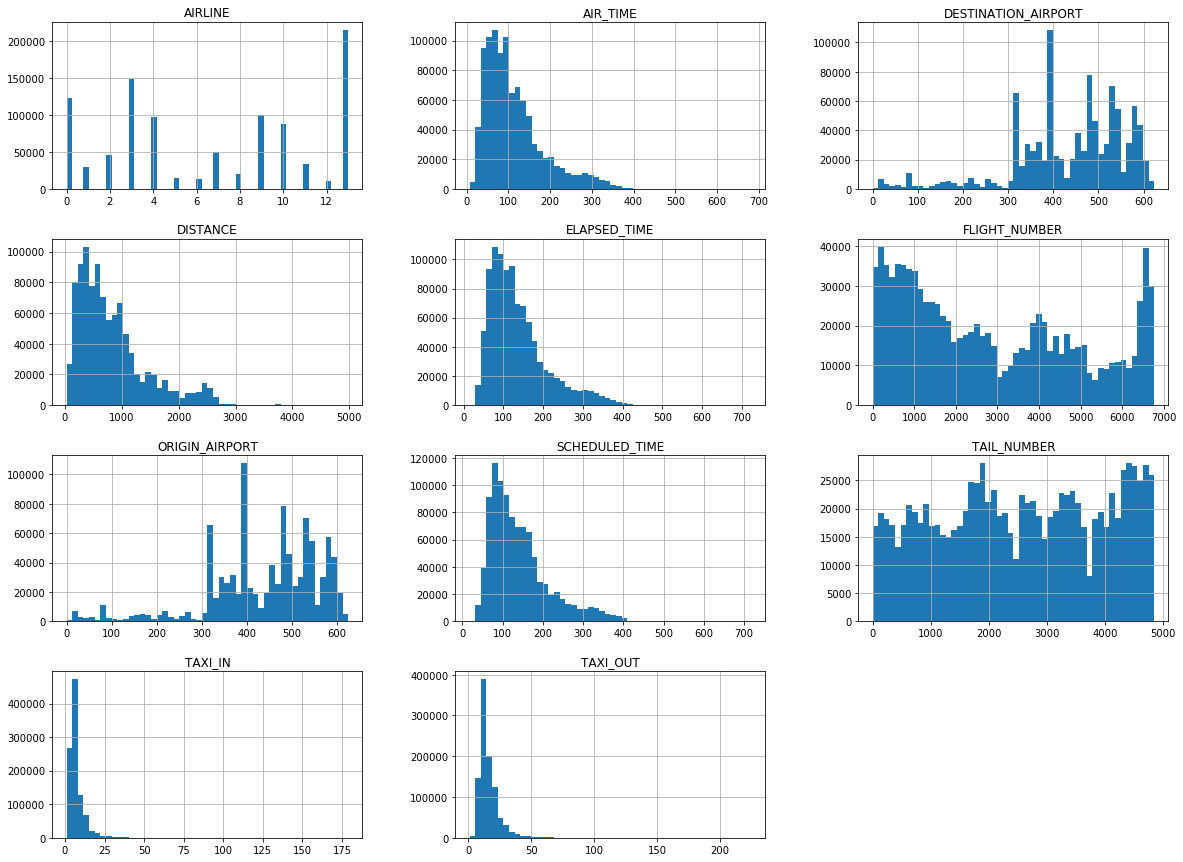

In [21]:
%matplotlib inline
transform_copy.hist(bins = 50, figsize = (20, 15))
plt.show()

In [22]:
correlation_matrix = transform_copy.corr()

In [23]:
correlation_matrix["AIRLINE"].sort_values(ascending = False)

AIRLINE                1.000000
FLIGHT_NUMBER          0.111047
TAIL_NUMBER            0.095959
ORIGIN_AIRPORT         0.076239
DESTINATION_AIRPORT    0.074975
TAXI_IN               -0.079668
DISTANCE              -0.082375
AIR_TIME              -0.086422
SCHEDULED_TIME        -0.105774
ELAPSED_TIME          -0.110566
TAXI_OUT              -0.170568
Name: AIRLINE, dtype: float64

In [24]:
train_set, test_set = train_test_split(transform_copy, test_size = 0.2, random_state = 42)

In [25]:
train_set.head(3)

,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,TAXI_OUT,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,TAXI_IN
882994,3.0,6402.0,1128.0,480.0,520.0,15.0,221.0,217.0,198.0,1670.0,4.0
249778,9.0,5083.0,3688.0,326.0,454.0,15.0,52.0,55.0,34.0,140.0,6.0
30609,12.0,6565.0,4007.0,582.0,539.0,11.0,100.0,94.0,81.0,550.0,2.0


In [26]:
test_set.head(3)

,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,TAXI_OUT,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,TAXI_IN
686489,13.0,3910.0,1668.0,526.0,495.0,8.0,200.0,206.0,193.0,1489.0,5.0
585468,0.0,2689.0,1390.0,263.0,214.0,17.0,255.0,245.0,210.0,1846.0,18.0
705282,9.0,4618.0,3148.0,455.0,331.0,16.0,227.0,208.0,187.0,1428.0,5.0


In [27]:
# Now we need to split up into test and train sets based on the airline (multi-class)

y_train = train_set["AIRLINE"]
y_test = test_set["AIRLINE"]
x_test = test_set.drop("AIRLINE", 1)
x_train = train_set.drop("AIRLINE", 1)


# We need to convert to float32 due to a warning we get when we do the dnn_clf
y_train = y_train.astype('float32')
y_test = y_test.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train.astype('float32')

In [28]:
y_train.head(2)

882994    3.0
249778    9.0
Name: AIRLINE, dtype: float32

In [29]:
x_train.head(2)

,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,TAXI_OUT,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,TAXI_IN
882994,6402.0,1128.0,480.0,520.0,15.0,221.0,217.0,198.0,1670.0,4.0
249778,5083.0,3688.0,326.0,454.0,15.0,52.0,55.0,34.0,140.0,6.0


# Large-Scale Visualization

Below we will be visualizing different aspects of our data to demonstrate that it is in fact a complex data set!

In [30]:
# Before we do anything, in order to feed the various clf's our labels, we must first convert them from
# float to integers

y_train_int = y_train.astype(int)
y_test_int = y_test.astype(int)

In [31]:
# x_train_ds = x_train.values
# x_test_ds = x_test.values

# Construction and Execution Phases

Using the built-in DNNClassifier(), the construction and execution phases are handled already.

## Fully connected network with 2 hidden layers

This is the neural network that we start with!

Also, just to note, since we don't specify here, the activation function being used is the relu (default)!

### Observations

First, we wanted to point out that we have the step size set to 50,000; however, the higher it is, the better performance it seems to get. We tested it at 100,000 and saw ~58% accuracy instead of ~53% at 50,000 steps (once at 50,000 steps we saw ~55% accuracy). We didn't test above 100,000 steps. The reason that we left it at 50,000 is so that it will execute faster. so 53-58% may not sound very accurate, but when you consider that we have 14 different airlines and that if you predicted only one of the fourteen for the test set, you would expect to see around a 7.14% accuracy (it depends on the distribution, this assumes that every airline is equally represented in the data set.) 

In [32]:
x_train.shape

(791395, 10)

In [33]:
# Since there are 14 different airlines, we need to change n_classes to 14, default seems to be 10
# NOTE: This will take a few minutes!!
# ALSO: The more steps you add, the better the accuracy is, however, we are going to put steps at 50,000
# so that it will not be an unreasonably long wait time!
# Steps = 100,000 equals 58% accuracy

feature_cols = tf.contrib.learn.infer_real_valued_columns_from_input(x_train)
dnn_clf_hidden = tf.contrib.learn.DNNClassifier(hidden_units = [300, 150], n_classes = 14, feature_columns = feature_cols)
dnn_clf_hidden = tf.contrib.learn.SKCompat(dnn_clf_hidden)
dnn_clf_hidden.fit(x_train, y_train_int, batch_size = 50, steps = 50000) 
# 10,000 (46%); 15,000 (47%), 40,000 (50%); 50,000 (53%); 100,000 (58%)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f2b8e446e80>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': '/tmp/tmpdu3z1poh'}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into /tmp/tmpdu3z1poh/model.ckpt.
INFO:tensorflow:loss = 338.58734, step = 1
INFO:tensorflow:global_step/sec: 84.1987
INFO:tensorflow:loss = 2.2785523, step = 101 (1.192 sec)
INFO:tensorflow:global_step/sec: 87.5981
INFO:tensorflow:loss

INFO:tensorflow:global_step/sec: 87.1422
INFO:tensorflow:loss = 1.7104034, step = 7301 (1.148 sec)
INFO:tensorflow:global_step/sec: 88.4105
INFO:tensorflow:loss = 1.203406, step = 7401 (1.131 sec)
INFO:tensorflow:global_step/sec: 88.029
INFO:tensorflow:loss = 1.4716808, step = 7501 (1.134 sec)
INFO:tensorflow:global_step/sec: 89.6267
INFO:tensorflow:loss = 1.6916428, step = 7601 (1.116 sec)
INFO:tensorflow:global_step/sec: 87.0659
INFO:tensorflow:loss = 1.5816171, step = 7701 (1.149 sec)
INFO:tensorflow:global_step/sec: 86.4407
INFO:tensorflow:loss = 1.58824, step = 7801 (1.156 sec)
INFO:tensorflow:global_step/sec: 89.557
INFO:tensorflow:loss = 1.8060086, step = 7901 (1.118 sec)
INFO:tensorflow:global_step/sec: 88.936
INFO:tensorflow:loss = 1.746879, step = 8001 (1.123 sec)
INFO:tensorflow:global_step/sec: 90.2542
INFO:tensorflow:loss = 1.6606097, step = 8101 (1.108 sec)
INFO:tensorflow:global_step/sec: 87.5186
INFO:tensorflow:loss = 1.7601298, step = 8201 (1.143 sec)
INFO:tensorflow:g

INFO:tensorflow:global_step/sec: 79.7711
INFO:tensorflow:loss = 1.7432317, step = 15601 (1.255 sec)
INFO:tensorflow:global_step/sec: 82.3704
INFO:tensorflow:loss = 1.5274211, step = 15701 (1.213 sec)
INFO:tensorflow:global_step/sec: 86.0635
INFO:tensorflow:loss = 1.5615784, step = 15801 (1.163 sec)
INFO:tensorflow:global_step/sec: 84.5191
INFO:tensorflow:loss = 1.5279052, step = 15901 (1.182 sec)
INFO:tensorflow:global_step/sec: 89.0711
INFO:tensorflow:loss = 1.5058185, step = 16001 (1.124 sec)
INFO:tensorflow:global_step/sec: 86.2962
INFO:tensorflow:loss = 1.6916344, step = 16101 (1.158 sec)
INFO:tensorflow:global_step/sec: 92.6751
INFO:tensorflow:loss = 1.4091972, step = 16201 (1.079 sec)
INFO:tensorflow:global_step/sec: 92.827
INFO:tensorflow:loss = 1.34786, step = 16301 (1.078 sec)
INFO:tensorflow:global_step/sec: 89.3577
INFO:tensorflow:loss = 1.4632357, step = 16401 (1.120 sec)
INFO:tensorflow:global_step/sec: 87.4021
INFO:tensorflow:loss = 1.475768, step = 16501 (1.144 sec)
INFO

INFO:tensorflow:loss = 1.5827935, step = 23801 (1.106 sec)
INFO:tensorflow:global_step/sec: 87.7718
INFO:tensorflow:loss = 1.2573701, step = 23901 (1.138 sec)
INFO:tensorflow:global_step/sec: 87.6336
INFO:tensorflow:loss = 1.4363369, step = 24001 (1.142 sec)
INFO:tensorflow:global_step/sec: 79.9698
INFO:tensorflow:loss = 1.5365548, step = 24101 (1.252 sec)
INFO:tensorflow:global_step/sec: 78.1115
INFO:tensorflow:loss = 1.4149735, step = 24201 (1.280 sec)
INFO:tensorflow:global_step/sec: 77.1111
INFO:tensorflow:loss = 1.4718205, step = 24301 (1.296 sec)
INFO:tensorflow:global_step/sec: 88.9049
INFO:tensorflow:loss = 1.2519189, step = 24401 (1.124 sec)
INFO:tensorflow:global_step/sec: 83.2325
INFO:tensorflow:loss = 1.5885701, step = 24501 (1.203 sec)
INFO:tensorflow:global_step/sec: 84.2118
INFO:tensorflow:loss = 1.3978456, step = 24601 (1.187 sec)
INFO:tensorflow:global_step/sec: 80.8019
INFO:tensorflow:loss = 1.4328742, step = 24701 (1.238 sec)
INFO:tensorflow:global_step/sec: 77.7414


INFO:tensorflow:global_step/sec: 81.5913
INFO:tensorflow:loss = 1.7639614, step = 32101 (1.216 sec)
INFO:tensorflow:global_step/sec: 71.7616
INFO:tensorflow:loss = 1.4361664, step = 32201 (1.399 sec)
INFO:tensorflow:global_step/sec: 66.3404
INFO:tensorflow:loss = 1.004593, step = 32301 (1.507 sec)
INFO:tensorflow:global_step/sec: 71.487
INFO:tensorflow:loss = 1.2968527, step = 32401 (1.397 sec)
INFO:tensorflow:global_step/sec: 65.7192
INFO:tensorflow:loss = 1.5405825, step = 32501 (1.523 sec)
INFO:tensorflow:global_step/sec: 74.3435
INFO:tensorflow:loss = 1.3609086, step = 32601 (1.341 sec)
INFO:tensorflow:global_step/sec: 84.7574
INFO:tensorflow:loss = 1.5100386, step = 32701 (1.180 sec)
INFO:tensorflow:global_step/sec: 86.0636
INFO:tensorflow:loss = 1.5995985, step = 32801 (1.163 sec)
INFO:tensorflow:global_step/sec: 85.8738
INFO:tensorflow:loss = 1.607801, step = 32901 (1.165 sec)
INFO:tensorflow:global_step/sec: 83.8868
INFO:tensorflow:loss = 1.4337857, step = 33001 (1.192 sec)
INF

INFO:tensorflow:loss = 1.4567295, step = 40301 (1.268 sec)
INFO:tensorflow:global_step/sec: 88.7169
INFO:tensorflow:loss = 1.2460548, step = 40401 (1.125 sec)
INFO:tensorflow:global_step/sec: 79.6747
INFO:tensorflow:loss = 1.3704927, step = 40501 (1.257 sec)
INFO:tensorflow:global_step/sec: 86.3192
INFO:tensorflow:loss = 1.4358886, step = 40601 (1.159 sec)
INFO:tensorflow:global_step/sec: 86.8321
INFO:tensorflow:loss = 1.272635, step = 40701 (1.152 sec)
INFO:tensorflow:global_step/sec: 87.497
INFO:tensorflow:loss = 1.2160566, step = 40801 (1.142 sec)
INFO:tensorflow:global_step/sec: 89.1778
INFO:tensorflow:loss = 1.4795069, step = 40901 (1.122 sec)
INFO:tensorflow:global_step/sec: 77.5785
INFO:tensorflow:loss = 1.1096754, step = 41001 (1.291 sec)
INFO:tensorflow:global_step/sec: 83.8753
INFO:tensorflow:loss = 1.4880339, step = 41101 (1.190 sec)
INFO:tensorflow:global_step/sec: 74.8
INFO:tensorflow:loss = 1.4305333, step = 41201 (1.339 sec)
INFO:tensorflow:global_step/sec: 63.4775
INFO:

INFO:tensorflow:global_step/sec: 89.1089
INFO:tensorflow:loss = 1.1326135, step = 48601 (1.123 sec)
INFO:tensorflow:global_step/sec: 88.5756
INFO:tensorflow:loss = 1.206904, step = 48701 (1.129 sec)
INFO:tensorflow:global_step/sec: 87.1412
INFO:tensorflow:loss = 1.2497197, step = 48801 (1.148 sec)
INFO:tensorflow:global_step/sec: 84.5758
INFO:tensorflow:loss = 1.3636596, step = 48901 (1.182 sec)
INFO:tensorflow:global_step/sec: 80.7143
INFO:tensorflow:loss = 1.2415161, step = 49001 (1.241 sec)
INFO:tensorflow:global_step/sec: 73.5742
INFO:tensorflow:loss = 1.4068776, step = 49101 (1.356 sec)
INFO:tensorflow:global_step/sec: 89.6046
INFO:tensorflow:loss = 1.1427858, step = 49201 (1.117 sec)
INFO:tensorflow:global_step/sec: 86.916
INFO:tensorflow:loss = 1.5131798, step = 49301 (1.151 sec)
INFO:tensorflow:global_step/sec: 88.2066
INFO:tensorflow:loss = 1.1927297, step = 49401 (1.133 sec)
INFO:tensorflow:global_step/sec: 80.8657
INFO:tensorflow:loss = 1.414427, step = 49501 (1.236 sec)
INF

SKCompat()

In [34]:
# This is the class accuracy score

y_predict_hidden = dnn_clf_hidden.predict(x_test)
accuracy_score(y_test_int, y_predict_hidden['classes'])

INFO:tensorflow:Restoring parameters from /tmp/tmpdu3z1poh/model.ckpt-50000


0.5275538415660428

In [ ]:
y_predict_hidden_test = dnn_clf_hidden.predict(x_test)

c = tf.confusion_matrix(y_test_int, y_predict_hidden_test['classes'])

with tf.Session():
    print('Confusion Matrix: \n\n', tf.Tensor.eval(c,feed_dict=None, session=None))

INFO:tensorflow:Restoring parameters from /tmp/tmpdu3z1poh/model.ckpt-50000
Confusion Matrix: 

 [[12685   245   188  2673   715    28   118   388   295   717  1737  1130
     53  3770]
 [  291  1114    34   220   177     0    25   142   413   762   462     8
      5  2214]
 [ 1044   373   784  1275   427    79     6    79   591   211  1308   176
     25  2679]
 [ 2098   169   230 18175  1051    92    50   182   227   905  2152   196
      1  4050]
 [   14     7    16   447 15158     3     0   482    65  1804    41    15
      0  1218]
 [   36     4    11   683   214   486     0    27     2   183   165    32
      0  1132]
 [   34    73     0   140    83     0  1851    53     0   202   132     0
      9    15]
 [   75    19     4    80   217     0    19  7456     2   443     2     0
      0  1733]
 [  299    56    94   100    50     0     8   132   789   325   345    42
      0  1835]
 [   51    13     2   161  4989     8    40   324   272 11002    41    15
      0  3388]
 [ 2068   543

# Testing out some Activation Functions

Our fully connected network with 2 hidden layers didn't perform to well, so let's experiment with some activation functions!

The first alternate activation function that we will try is the sigmoid, after than we will try the tanh; in both cases the accuracy decreased from the default relu function.

In [ ]:
dnn_clf_sig = tf.contrib.learn.DNNClassifier(hidden_units = [300, 150], n_classes = 14, activation_fn="sigmoid", feature_columns = feature_cols)
dnn_clf_sig = tf.contrib.learn.SKCompat(dnn_clf_sig)
dnn_clf_sig.fit(x_train, y_train_int, batch_size = 50, steps = 50000) # 10,000 steps

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f2b8f79bef0>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': '/tmp/tmps5uf202e'}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into /tmp/tmps5uf202e/model.ckpt.
INFO:tensorflow:loss = 2.9307356, step = 1
INFO:tensorflow:global_step/sec: 73.7265
INFO:tensorflow:loss = 2.1337984, step = 101 (1.360 sec)
INFO:tensorflow:global_step/sec: 80.5765
INFO:tensorflow:loss

INFO:tensorflow:global_step/sec: 80.0648
INFO:tensorflow:loss = 1.3786496, step = 7401 (1.250 sec)
INFO:tensorflow:global_step/sec: 81.397
INFO:tensorflow:loss = 1.51376, step = 7501 (1.225 sec)
INFO:tensorflow:global_step/sec: 82.6307
INFO:tensorflow:loss = 1.6467857, step = 7601 (1.208 sec)
INFO:tensorflow:global_step/sec: 87.0026
INFO:tensorflow:loss = 1.8048129, step = 7701 (1.150 sec)
INFO:tensorflow:global_step/sec: 82.461
INFO:tensorflow:loss = 1.7487508, step = 7801 (1.214 sec)
INFO:tensorflow:global_step/sec: 79.0188
INFO:tensorflow:loss = 1.7537538, step = 7901 (1.269 sec)
INFO:tensorflow:global_step/sec: 86.9494
INFO:tensorflow:loss = 1.9345204, step = 8001 (1.145 sec)
INFO:tensorflow:global_step/sec: 82.6025
INFO:tensorflow:loss = 1.7313089, step = 8101 (1.211 sec)


In [ ]:
y_predict_sig = dnn_clf_sig.predict(x_test)
accuracy_score(y_test_int, y_predict_sig['classes'])

## Now let's try out tanh activation function

In [ ]:
dnn_clf_tanh = tf.contrib.learn.DNNClassifier(hidden_units = [300, 150], n_classes = 14, activation_fn="tanh", feature_columns = feature_cols)
dnn_clf_tanh = tf.contrib.learn.SKCompat(dnn_clf_tanh)
dnn_clf_tanh.fit(x_train, y_train_int, batch_size = 50, steps = 50000) # 10,000 steps

In [ ]:
y_predict_tanh = dnn_clf_tanh.predict(x_test)
accuracy_score(y_test_int, y_predict_tanh['classes'])

# Tweaking the Model Parameters to Improve Performance

Below we are experimenting with a few different optimizers; since our first dnn classifier saw the best performance, we will be testing the optimizers with it.

Since there seems to be some variance with each run of the notebook, we had to create some try-throw-catch statements so that the program would keep running. The first time we did this part, we set the learning rates so there were no errors, when we restarted the notebook and rerun the code, the same parameters gave errors that crashed the program. With the try statements, we will keep the last learning rate that guarantees the dnn to run with it.

In [ ]:
optimizer_1 = tf.train.MomentumOptimizer(learning_rate = .2, momentum = .9)

In [ ]:
dnn_clf_hidden_optimizer = tf.contrib.learn.DNNClassifier(hidden_units = [300, 150], n_classes = 14, feature_columns = feature_cols, optimizer = optimizer_1)
dnn_clf_hidden_optimizer = tf.contrib.learn.SKCompat(dnn_clf_hidden_optimizer)
dnn_clf_hidden_optimizer.fit(x_train, y_train_int, batch_size = 50, steps = 50000) # 10,000 (46%); 15,000 (47%), 40,000 (50%)

In [ ]:
y_predict_hidden_optimizer = dnn_clf_hidden_optimizer.predict(x_test)
accuracy_score(y_test_int, y_predict_hidden_optimizer['classes'])

In [ ]:
optimizer_2 = tf.train.MomentumOptimizer(learning_rate = .5, momentum = .9, use_nesterov=True)

In [ ]:
dnn_clf_hidden_optimizer_2 = tf.contrib.learn.DNNClassifier(hidden_units = [300, 150], n_classes = 14, feature_columns = feature_cols, optimizer = optimizer_2)
dnn_clf_hidden_optimizer_2 = tf.contrib.learn.SKCompat(dnn_clf_hidden_optimizer_2)
dnn_clf_hidden_optimizer_2.fit(x_train, y_train_int, batch_size = 50, steps = 50000) # 10,000 (46%); 15,000 (47%), 40,000 (50%)

In [ ]:
y_predict_hidden_optimizer_2 = dnn_clf_hidden_optimizer_2.predict(x_test)
accuracy_score(y_test_int, y_predict_hidden_optimizer_2['classes'])

In [ ]:
optimizer_3 = tf.train.RMSPropOptimizer(learning_rate = .2, momentum = .9, decay = .9, epsilon = 1e-10)

In [ ]:
dnn_clf_hidden_optimizer_3 = tf.contrib.learn.DNNClassifier(hidden_units = [300, 150], n_classes = 14, feature_columns = feature_cols, optimizer = optimizer_3)
dnn_clf_hidden_optimizer_3 = tf.contrib.learn.SKCompat(dnn_clf_hidden_optimizer_3)
dnn_clf_hidden_optimizer_3.fit(x_train, y_train_int, batch_size = 50, steps = 50000) # 10,000 (46%); 15,000 (47%), 40,000 (50%)

In [ ]:
y_predict_hidden_optimizer_3 = dnn_clf_hidden_optimizer_3.predict(x_test)
accuracy_score(y_test_int, y_predict_hidden_optimizer_3['classes'])

In [ ]:
optimizer_4 = tf.train.AdamOptimizer(learning_rate = .2)

In [ ]:
dnn_clf_hidden_optimizer_4 = tf.contrib.learn.DNNClassifier(hidden_units = [300, 150], n_classes = 14, feature_columns = feature_cols, optimizer = optimizer_4)
dnn_clf_hidden_optimizer_4 = tf.contrib.learn.SKCompat(dnn_clf_hidden_optimizer_4)
dnn_clf_hidden_optimizer_4.fit(x_train, y_train_int, batch_size = 50, steps = 50000) # 10,000 (46%); 15,000 (47%), 40,000 (50%)

In [ ]:
y_predict_hidden_optimizer_4 = dnn_clf_hidden_optimizer_4.predict(x_test)
accuracy_score(y_test_int, y_predict_hidden_optimizer_4['classes'])

# Present Solution
